In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [7]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-10-05,3260.729980,3202.459961,3204.500000,3221.000000,3269200.0,3221.000000,AMAZON
2021-10-06,3264.340088,3198.620117,3213.530029,3262.010010,2533000.0,3262.010010,AMAZON
2021-10-07,3325.750000,3283.060059,3291.540039,3302.429932,2409100.0,3302.429932,AMAZON
2021-10-08,3321.429932,3288.199951,3317.000000,3288.620117,1995500.0,3288.620117,AMAZON
2021-10-11,3292.590088,3238.100098,3275.000000,3246.300049,2034200.0,3246.300049,AMAZON
2021-10-12,3267.530029,3236.280029,3257.000000,3247.330078,1819600.0,3247.330078,AMAZON
2021-10-13,3288.379883,3261.090088,3269.709961,3284.280029,2420100.0,3284.280029,AMAZON
2021-10-14,3312.600098,3290.780029,3302.449951,3299.860107,2109500.0,3299.860107,AMAZON
2021-10-15,3410.419922,3304.000000,3311.419922,3409.020020,5175100.0,3409.020020,AMAZON


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,133.946429,131.160476,132.580953,132.585357,9.395324e+07,132.248511
std,10.940086,11.032929,10.996325,11.039883,2.926084e+07,11.202437
min,110.680000,107.320000,109.110001,108.769997,4.639770e+07,108.074883
25%,125.322498,122.317497,123.842503,124.207499,7.422112e+07,123.747398
50%,132.590004,129.649994,131.285004,131.625000,8.864400e+07,131.152008
75%,144.320004,141.549995,143.234997,142.904995,1.090533e+08,142.814999
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.690002


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-19 to 2021-10-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


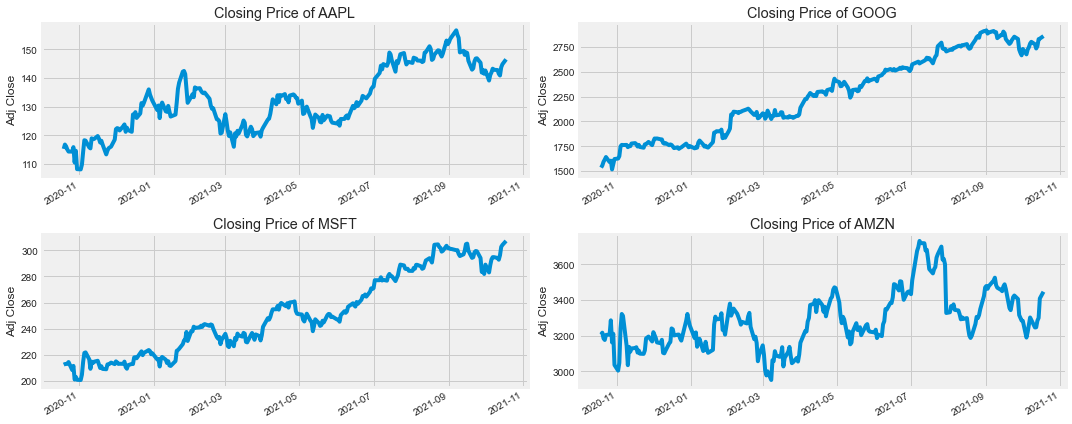

In [13]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.5, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i-1]}')
    
plt.tight_layout()

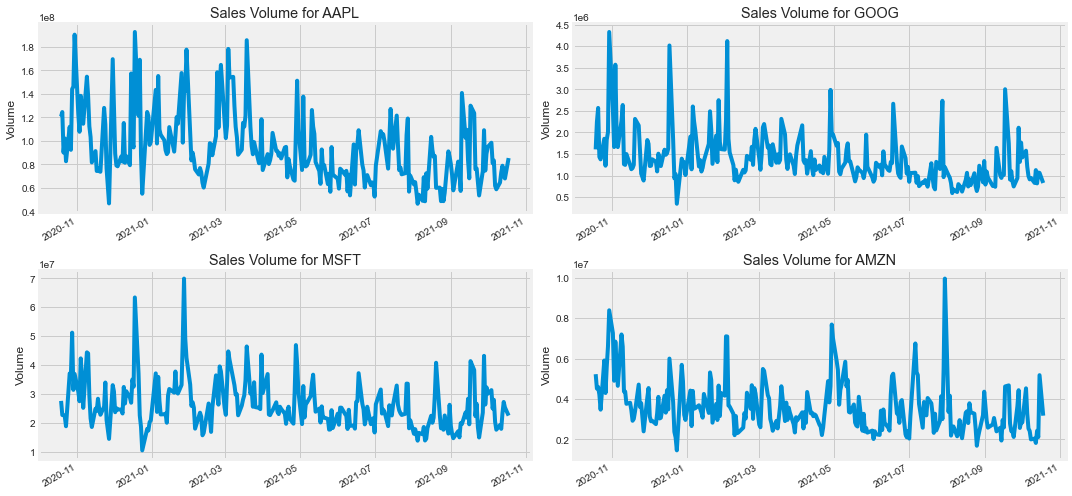

In [14]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume for {tech_list[i-1]}')
    
plt.tight_layout()

In [ ]:
#What was the moving average of the various stocks

In [16]:
ma_day = [10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

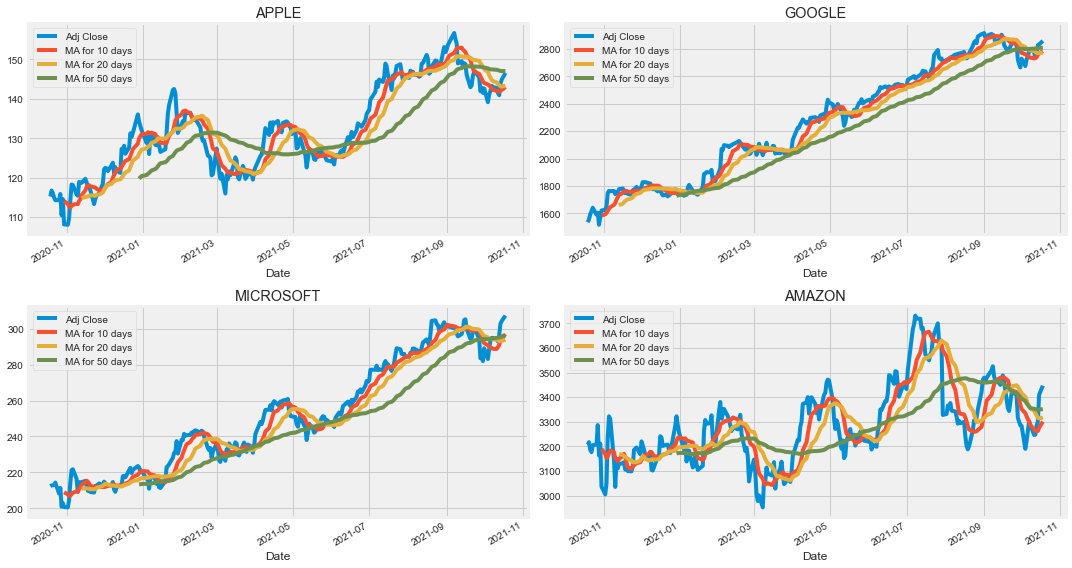

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [ ]:
#What was the daily return of the stock 